# UK Accidents Data Exploraion
## by (Mervat Khaled)


## Investigation Overview

>In this investigation, I wanted to look at what causes Serious and Not Serious accidents. The main focus was on: 
road type, time, age of driver, age of the vehicle, Driver IMD deprivation, speed limit...
## Dataset Overview


>This data provide details about the circumstances of personal injury road accidents in Great Britain from 2005 to 2014, the types of vehicles involved, and the consequential casualties. The statistics relate only to personal injury accidents on public roads that are reported to the police and subsequently recorded, using the STATS19 accident reporting form. Information on damage-only accidents, with no human casualties or accidents on private roads or car parks, is not included in this data.

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',100)
pd.options.display.float_format='{:,.2f}'.format
import re

In [3]:
uk_accidents=pd.read_csv('data\\uk_accidents_3.csv')

In [4]:
for col in uk_accidents[['age_of_driver','age_of_casualty']]:
    uk_accidents[col]=uk_accidents[col].astype(int)

In [5]:
uk_accidents['age_of_driver'].dtype

dtype('int32')

In [6]:
uk_accidents.loc[uk_accidents.accident_severity.isin(['Serious','Fatal']),'accident_severity'] = 'Serious'
uk_accidents.loc[uk_accidents.accident_severity.isin(['Slight']),'accident_severity'] = 'Not Serious'

In [7]:
bin_names=['5-15','15-25','25-35','35-45','45-55','55-65','65-75','over 75']
bin_edges=[5,15,25,35,45,55,65,75,90]
uk_accidents['age_band_of_driver']=pd.cut(uk_accidents.age_of_driver,bin_edges,labels=bin_names)

### Did driver age has an effect in the number of accidents? 

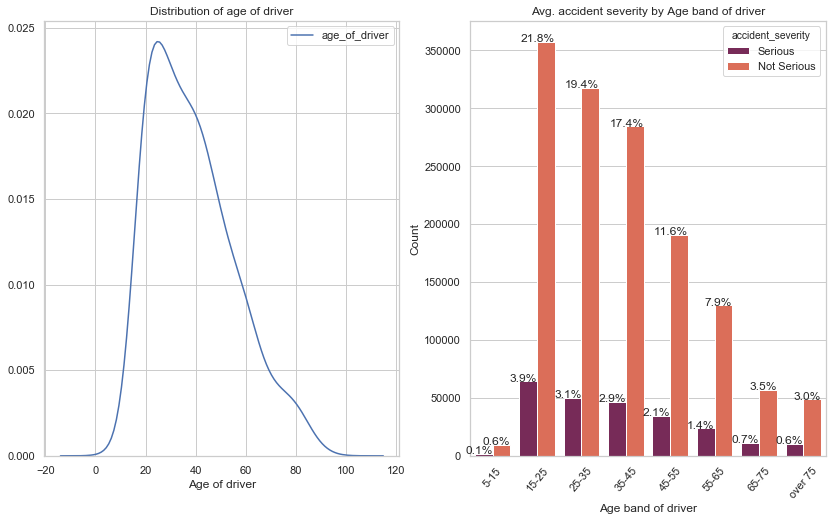

In [16]:
sb.set(font_scale=2)
sb.set(style="whitegrid")
plt.figure(figsize=[14,8])
plt.subplot(1, 2, 1)
sb.kdeplot(uk_accidents_2.age_of_driver, bw=5)
plt.title('Distribution of age of driver')
plt.xlabel('Age of driver')

plt.subplot(1, 2, 2)
counts = uk_accidents['age_band_of_driver'].value_counts()
n_age_band=uk_accidents['age_band_of_driver'].value_counts().sum()

ax = sb.countplot(data = uk_accidents, x = 'age_band_of_driver', hue = 'accident_severity',\
             palette='rocket')
plt.xlabel('Age band of driver')
plt.ylabel('Count')
plt.title('Avg. accident severity by Age band of driver')
plt.xticks(rotation=50)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/n_age_band)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.savefig('age_of_driver.png')
plt.show()

> The left figure depicts The distribution of drivers' ages involved in accidents, it can be noted that the most frequent ages clumped up between 15-35. And bar chart highlights the trend of serious accidents,We clearly see people from 15 to 45 have a higher precentage of serious accidents than other bands.

In [17]:
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

In [18]:
uk_accidents['day_time']=uk_accidents['hour'].apply(when_was_it)

### When did accidents usually happen?

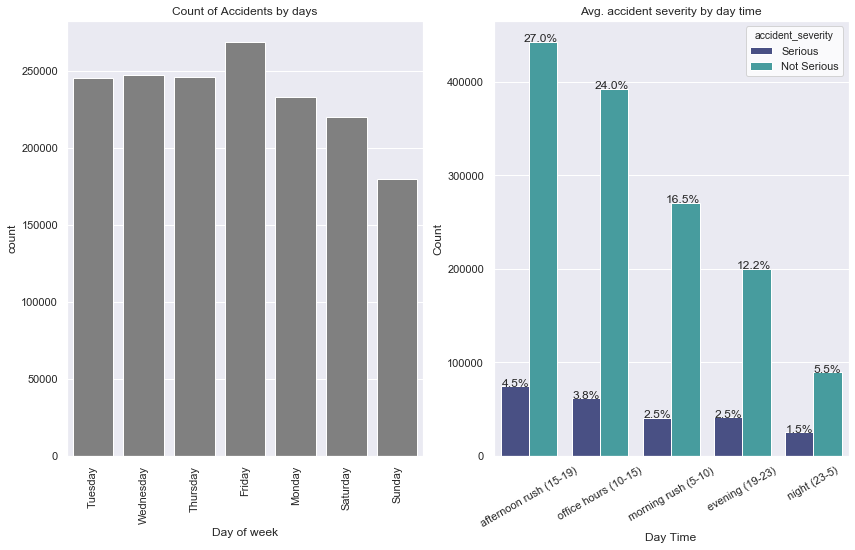

In [26]:
sb.set(font_scale=1)
plt.figure(figsize=[14,8])
plt.subplot(1, 2, 1)
sb.countplot(x=uk_accidents_2.day_of_week,color='grey')
plt.title("Count of Accidents by days")
plt.xlabel('Day of week')
plt.xticks(rotation=90);
plt.subplot(1, 2, 2)
sb.set(style="whitegrid")
counts = uk_accidents['day_time'].value_counts()
n_day_time=uk_accidents['day_time'].value_counts().sum()

ax = sb.countplot(data = uk_accidents, x = 'day_time', hue = 'accident_severity',\
             palette='mako',order=uk_accidents.day_time.value_counts().index)
plt.xlabel('Day Time')
plt.ylabel('Count')
plt.title('Avg. accident severity by day time')
plt.xticks(rotation=30)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/n_day_time)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.savefig('accidents_by_days.png')    
plt.show()

>From the left figure, we can see that Sunday has the minimum occurrence of accidents compared to other weekdays, therefore there is a significant difference in traffic accidents between weekdays and weekends.And the second figure illustrates the trend of relatively high accidents count during the afternoon rush (15-19) and office hours (10-15).

In [41]:
def plot_clusterd_heatmap2(data,col1,col2,*args):
    plt.figure(figsize=(8,6))
    cat_counts=data.groupby([col1, col2]).size().unstack()
    cat_counts=cat_counts.apply(lambda x:x/x.sum()*100,axis=0) #percentage of values
    ax=sb.heatmap(cat_counts,annot=True,cmap='BrBG_r')
    return ax,ax.hlines(args,*ax.get_xlim(),colors='gold'),\
plt.xlabel(re.sub('_',' ',col2.title())),plt.ylabel(re.sub('_',' ',col1.title())),\
plt.title(f"Avg. {col2.replace('_',' ').title()} by {col1.replace('_',' ').title()}")

### The total annual accidents 

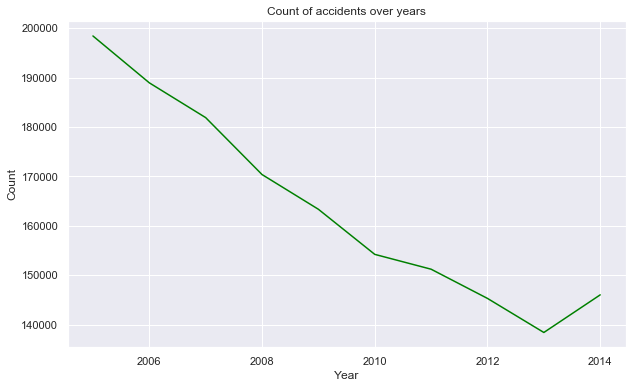

In [31]:
sb.set()
plt.figure(figsize=[10,6])
sb.lineplot(x=uk_accidents_2.year.value_counts().index,y=uk_accidents.year.value_counts().values ,color='green')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of accidents over years');

> The line graph shows that the number of accidents from 2005 to 2012 declined, however, there is a slight spike in the number from 2013 to 2014.

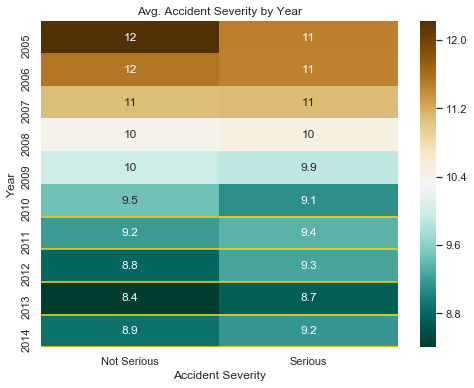

In [42]:
plot_clusterd_heatmap2(uk_accidents,'year','accident_severity',[6,7,8,9,10]);

> Also from 2011 to 2014, There has been a slight spike in the percentage of serious accidents than Not serious accidents. 

### Was the accident severity dependent on social class?

In [23]:
uk_accidents_not_missing=uk_accidents.loc[~uk_accidents.driver_imd_decile.isin(['Missing'])]
uk_accidents_not_missing.loc[uk_accidents_not_missing.driver_imd_decile.isin([
    'Most deprived 10%','More deprived 10-20%','More deprived 20-30%','More deprived 30-40%','More deprived 40-50%'
]),'driver_imd_decile']= 'More deprived'
uk_accidents_not_missing.loc[uk_accidents_not_missing.driver_imd_decile.isin([
    'Least deprived 10%','Less deprived 10-20%','Less deprived 20-30%','Less deprived 30-40%','Less deprived 40-50%'
]),'driver_imd_decile']= 'Less deprived'

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


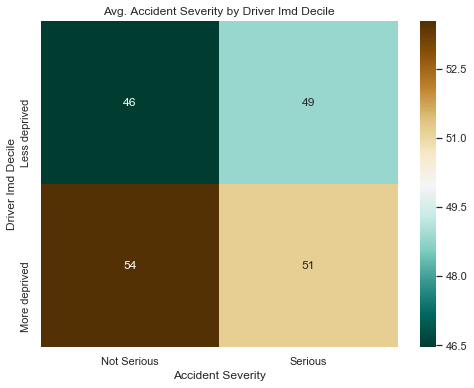

In [43]:
plot_clusterd_heatmap2(uk_accidents_not_missing,'driver_imd_decile','accident_severity');

>Before we describe what happens in the graph, we should define what IMD Deprivation means. 
* An Index of Multiple Deprivation [IMD](https://en.wikipedia.org/wiki/Multiple_deprivation_index) is used to identify how deprived an area is. It uses a range of economic, social, and housing data to create a single deprivation score for each small area of the country.
>* There seven domains of deprivation are considered and weighted as follows:
>1- Income Deprivation 22.5 % 
2- Employment Deprivation 22.5%
3- Health Deprivation and Disability 13.5%
4- Education, Skills and Training Deprivation 13.5% 
5- Barriers to Housing and Services 9.3%
6- Crime 9.3%
7- Living Environment Deprivation 9.3%
Anyway, the graph shows that areas which had more deprivation "with low-quality services" had a higher percentage of a number of accidents than fewer deprivation areas, however, fewer deprivation areas had a slightly higher percentage of serious accidents than a slight accident.

In [25]:
uk_accidents.loc[uk_accidents.age_of_vehicle >8,'age_of_vehicle']='8+'

### Did the age of the vehicle have an effect on accidents?

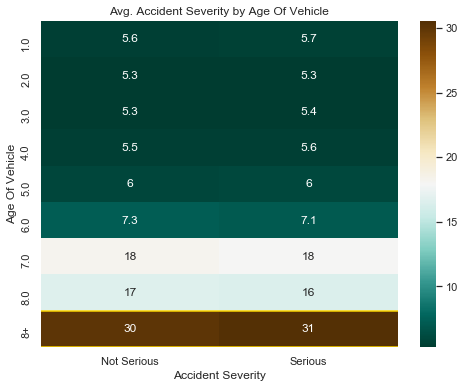

In [44]:
plot_clusterd_heatmap2(uk_accidents,'age_of_vehicle','accident_severity',[8,9]);

> There was a strong relationship between the age of the vehicle and accident severity, the older the car, the more accidents it gets into, so the oldest vehicles(+8) were involved more in accidents than the newest vehicles. 

### Did speed limit and road type have an influence on the seriousness of accidents?

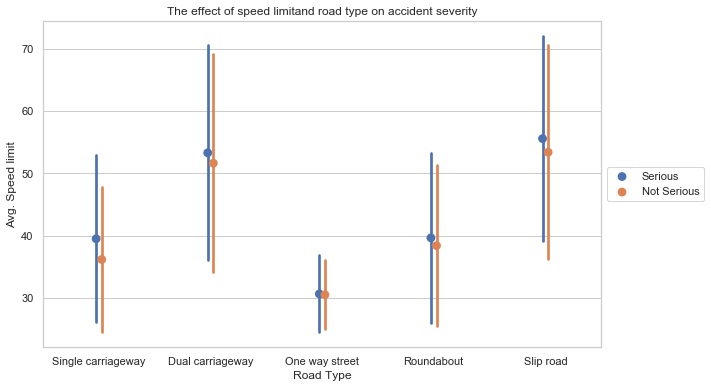

In [27]:
plt.figure(figsize=(10,6))
sb.pointplot(data=uk_accidents.loc[~uk_accidents.road_type.isin(['Unknown'])],x='road_type',y='speed_limit',\
             hue='accident_severity',ci='sd',linestyles="",dodge=True)
plt.ylabel('Avg. Speed limit')
plt.xlabel('Road Type')
plt.title('The effect of speed limitand road type on accident severity')
plt.savefig('accidents_by_speed.png')    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

> The graph illustrates that speed limit and type of road have a strong influence on the seriousness of accidents rate. And slip roads and dual carriageways are more deadly within high-speed driving.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle.tpl